# Names and NetIDs

#### Ajibike Lawal (asl613)
#### Alan Xia (ax2054)
#### Matt Grzyb (mdg9707)
#### Ben Davis (bfd233)


# Final Project Question 2: Can normality in serum creatinine or ejection fraction be used as a strong predictor of death, and which works better?

Background: There are many factors that lead to death for those with heart disease. Specifically we want to look at serum creatinine and ejection fraction. We want to identify what a normal range looks like for each, and see whether falling into the normal range or not can be used to correlate with death event. We also want to see whether serum creatinine or ejection fraction works better, as measured by correlation.

The implication of this work is that it could allow doctors to better predict the outcome of death based on test result from serum creatinine or ejection fraction. 

### Prepping the Data

We want to set the data .csv file into a data frame

In [1]:
# Imports modules
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
# Grabbing the file path
my_path = os.getcwd()
my_path

'C:\\Users\\axia2\\Downloads'

In [3]:
# Establishing the dataframe
df = pd.read_csv(my_path + "/" + "heart_failure_clinical_records_dataset.csv")

In [4]:
# Prints data frame
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


The data needs to be checked for nulls to ensure the data is usable

In [5]:
# Takes the sum of null values for each column
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

We drop all columns in df except ejection fraction, serume creatinine, sex, and death event. We keep sex as gender is a factor of consideration we use later.

In [6]:
# Sets df as only having the columns targeted
df = df[["ejection_fraction","serum_creatinine","sex","DEATH_EVENT"]]

Printing the new dataframe

In [7]:
# Reprints the dataframe
df

,ejection_fraction,serum_creatinine,sex,DEATH_EVENT
0,20,1.9,1,1
1,38,1.1,1,1
2,20,1.3,1,1
3,20,1.9,1,1
4,20,2.7,0,1
...,...,...,...,...
294,38,1.1,1,0
295,38,1.2,0,0
296,60,0.8,0,0
297,38,1.4,1,0


### Producing Scatterplots

We plot both serum creatinine and ejection fraction against death event to see what we can observe. We expect death event to only be 0 or 1 since it is binary data where 1 = death and 0 = no death.

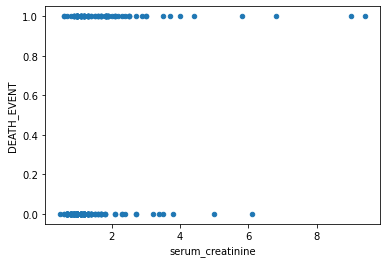

In [8]:
# Produces a scatterplot where the x-axis is serum creatinine and the y-axis is death event
plot1 = df.plot.scatter(x='serum_creatinine',y='DEATH_EVENT')

The tight clustering to the left indicates that there is a normal range for serum creatinine. The difference between the top and bottom tell us that there is some correlation between serum creatinine and death as the points plotted at the top are those representing death event and the points at the bottom are those representing no death event. 

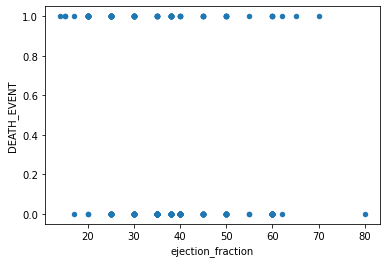

In [9]:
# Produces a scatterplot where the x-axis is ejection fraction and the y-axis is death event
plot2 = df.plot.scatter(x='ejection_fraction',y='DEATH_EVENT')

Again comparing the top and bottom points plotted, it can be observed that the two lines are similar. Indicates that there is a weaker correlation, but we still want to check. 

### Finding Normal Ranges

We look to medical resources for normal levels and in this case, the source in both is the Mayo Clinic

##### Normal Creatinine Levels: 

For adult men, 0.74 to 1.35 mg/dL (65.4 to 119.3 micromoles/L)


For adult women, 0.59 to 1.04 mg/dL (52.2 to 91.9 micromoles/L)


Source: https://www.mayoclinic.org/tests-procedures/creatinine-test/about/pac-20384646

##### Normal Serum Creatinine Levels:

A normal ejection fraction is about 50% to 75%, according to the American Heart Association.

A borderline ejection fraction can range between 41% and 50%.

Below 40% is considered heart failure.

Source: https://www.mayoclinic.org/tests-procedures/ekg/expert-answers/ejection-fraction/faq-20058286

Note: For the sake of the test and determining a normal ejection fraction range, we count above 50 as normal

### Data Conversion

Now that we have normal and abnormal ranges for both serum creatinine and ejection fraction, we add two new columns (one for normal serum creatinine and another for normal ejection fraction). For both, we use binary values where 1 = normal and 0 = abnormal. 

In [10]:
# Creates a function using if statements to return the binary value representing normal or not. 
# A function is used because there are two factors that go into a normal value (sex and serum creatinine)
def testcreatinine(row):
    if row['sex'] == 1:
        if .74 < row['serum_creatinine'] < 1.35:
            return 1
        else:
            return 0
    if row['sex'] == 0:
        if .59 < row['serum_creatinine'] < 1.04:
            return 1
        else:
            return 0

In [11]:
# Creates a new normal column applying the function written above
df['normal_serum_creatinine'] = df.apply(testcreatinine,axis=1)

<ipython-input-11-2439c66b71cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['normal_serum_creatinine'] = df.apply(testcreatinine,axis=1)


In [12]:
# Creates a new normal column using the 40% normal condition
df['normal_ejection_fraction'] = np.where(df['ejection_fraction']> 40, 1, 0)

<ipython-input-12-c87f6ecf12e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['normal_ejection_fraction'] = np.where(df['ejection_fraction']> 40, 1, 0)


### The New Dataframe

In [13]:
# Prints the data frame with the new columns added
df

,ejection_fraction,serum_creatinine,sex,DEATH_EVENT,normal_serum_creatinine,normal_ejection_fraction
0,20,1.9,1,1,0,0
1,38,1.1,1,1,1,0
2,20,1.3,1,1,1,0
3,20,1.9,1,1,0,0
4,20,2.7,0,1,0,0
...,...,...,...,...,...,...
294,38,1.1,1,0,1,0
295,38,1.2,0,0,0,0
296,60,0.8,0,0,1,1
297,38,1.4,1,0,0,0


### Finding Correlations

In [14]:
# Stores the correlation between normal serum creatinine and death event
corr_serum_creatinine = df["normal_serum_creatinine"].corr(df["DEATH_EVENT"])

In [15]:
# Prints the correlation
corr_serum_creatinine

-0.2208197935444394

In [16]:
# Stores the correlation between normal ejection fraction and death event
corr_ejection_fraction = df["normal_ejection_fraction"].corr(df["DEATH_EVENT"])

In [17]:
# Prints the correlation
corr_ejection_fraction

-0.10818376900701121

### Conclusion

The correlations we receive are represented in statistics by r, or the coefficient of correlation. 

The correlation between normal serum creatinine and death event is -.2208

The correlation between normal ejection fraction and death event is -.1082

Both have negative correlations which gives us the logical conclusion that abnormal values lead to death events.

However, both correlations are low, which tells as that this would not be an effective metric. However, previous results in part 1 of the final indicate that in tandem with other factors both serum creatinine and ejection fraction are useful, they just cannot be used individually.

As to which one is more effective, the efficacy of both are low but the correlation with normal serum creatinine and death event is better in comparison.